# **Problem Statment**

Dataset:salary_data.csv

Build simple linear regression model by performing EDA and do necessary transformations and select the best model using Python

Salary_hike -> Build a prediction model for Salary_hike

# **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

# **Importing the Dataset**

In [5]:
df=pd.read_csv("Salary_Data.csv")

In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# **Performing EDA**

In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

By seeing this will get to know that there is not null values in our data.

In [11]:
#Renaming the columns for ease of usage
df1=df.rename({'YearsExperience':'YExp', 'Salary':'Sal'},axis=1)

<Axes: xlabel='Sal', ylabel='Count'>

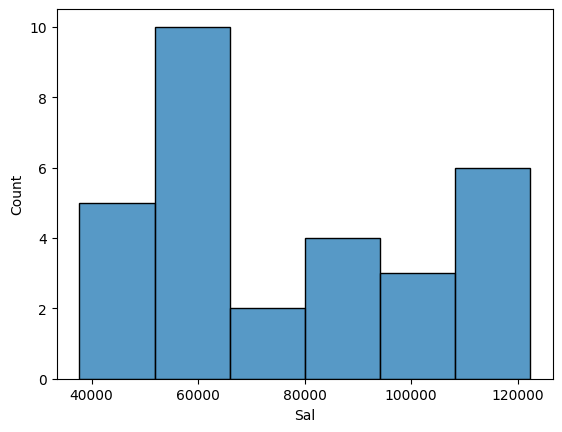

In [13]:
#checking the histogram of feature column
sns.histplot(df1.Sal)

<Axes: xlabel='YExp', ylabel='Count'>

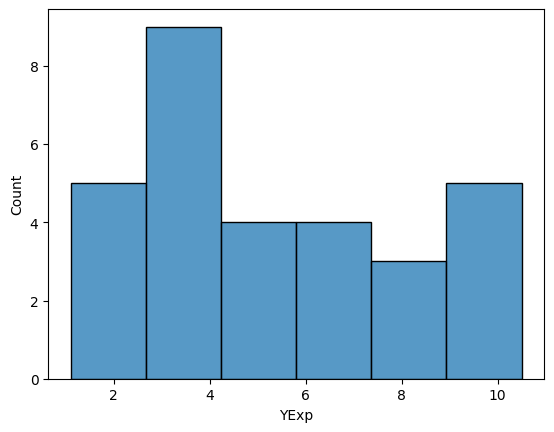

In [14]:
#checking the histogram of target column
sns.histplot(df1.YExp)

<Axes: xlabel='Sal', ylabel='Density'>

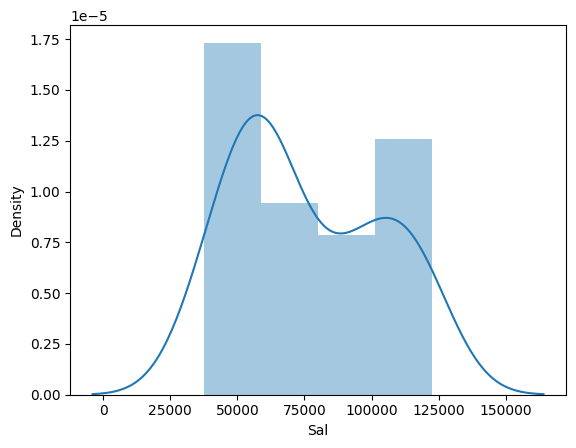

In [16]:
#checking the distplot of feature column
sns.distplot(df1.Sal)

<Axes: xlabel='YExp', ylabel='Density'>

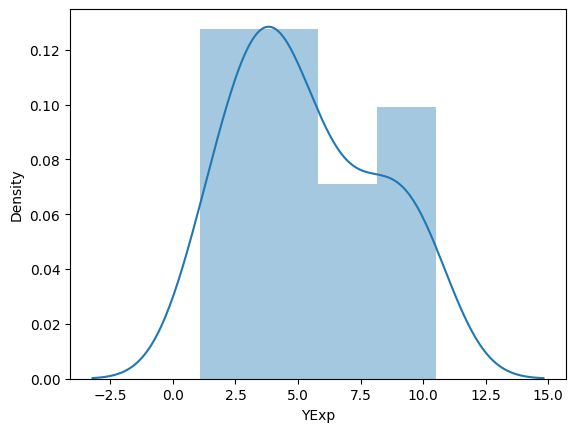

In [17]:
#checking the distplot of target column
sns.distplot(df1.YExp)

<Axes: xlabel='Sal', ylabel='YExp'>

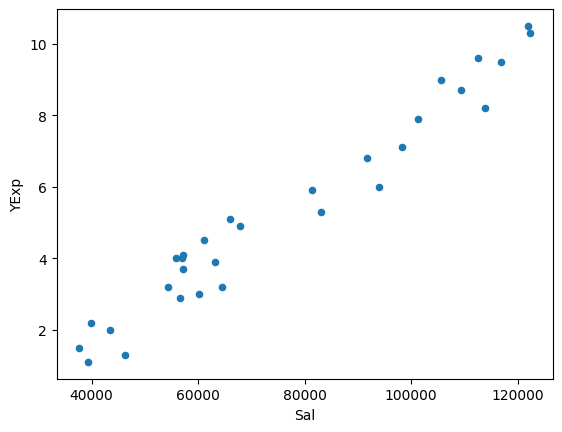

In [24]:
df1.plot('Sal','YExp',kind='scatter')

From the plot we can see that the relationship does appear to be linear. As experience increases, salary tends to increase in a linear fashion.

<Axes: xlabel='YExp'>

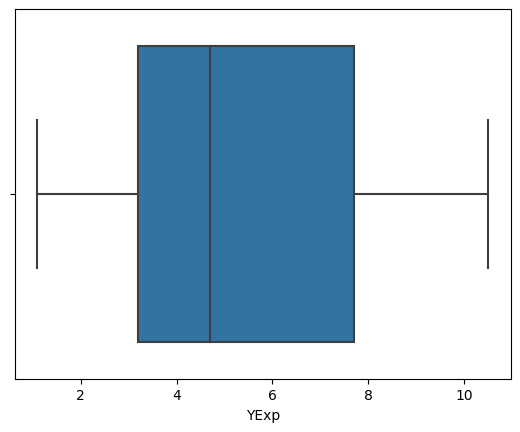

In [20]:
#Checking for the outliers in target column
sns.boxplot(x='YExp', data=df1)

<Axes: xlabel='Sal'>

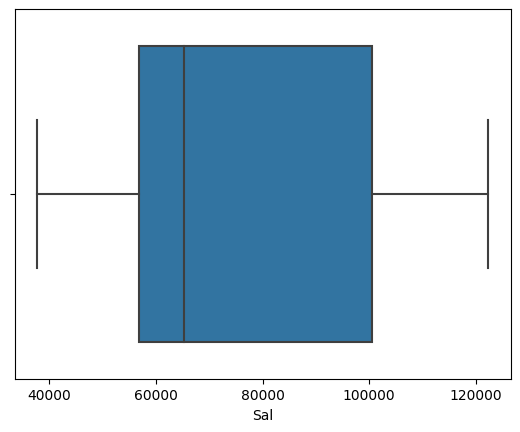

In [21]:
#Checking for the outliers in feature column
sns.boxplot(x='Sal', data=df1)

By seeing the above two plots will get to know that there is not having outliers in our data.

In [22]:
df1.corr()

,YExp,Sal
YExp,1.000000,0.978242
Sal,0.978242,1.000000


by checking the correlation of the data we will get to know tha the feature is 97% corelated with the target.

# **Building a model**

In [30]:
model = smf.ols('Sal~YExp' , data=df1).fit()

<Axes: xlabel='YExp', ylabel='Sal'>

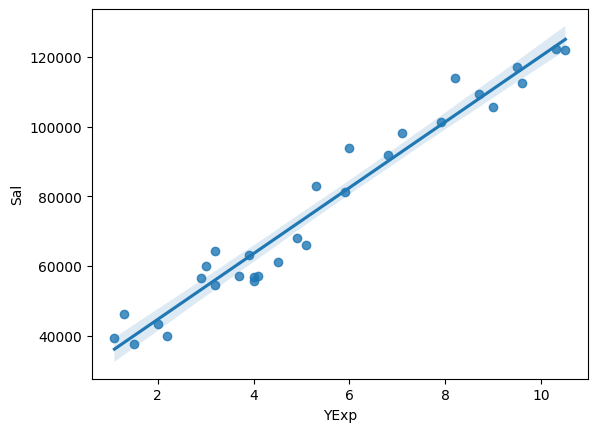

In [31]:
sns.regplot(x='YExp', y='Sal', data=df1)

In [38]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.14e-20
Time:                        10:39:00   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.0

In [39]:
model.params

Intercept    25792.200199
YExp          9449.962321
dtype: float64

#The R-Squared value is >0.95, hence we can say it's an excellent model and there's no need for any interation.

# **Predicting the existing data**

In [40]:
pred = pd.DataFrame (model.predict(df1), columns=['Predicted Salary'])

In [41]:
pred

,Predicted Salary
0,36187.158752
1,38077.151217
2,39967.143681
3,44692.124842
4,46582.117306
5,53197.090931
6,54142.087163
7,56032.079627
8,56032.079627
9,60757.060788


In [42]:
pred1 = pd.concat([df1, pred], axis=1)
pred1

,YExp,Sal,Predicted Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


# **Predicting the new data**

In [43]:
new_data= pd.Series([5,7,11,15,20])

In [44]:
pred_new = pd.DataFrame(new_data, columns=['YExp'])

In [45]:
model.predict(pred_new)

0     73042.011806
1     91941.936449
2    129741.785735
3    167541.635020
4    214791.446628
dtype: float64

# **Model Evaluation**

In [48]:
Error = pd.DataFrame ((pred1['Sal']- pred1['Predicted Salary']), columns=['Error'])

In [49]:
final = pd.concat ([pred1, Error], axis=1)

In [50]:
final

,YExp,Sal,Predicted Salary,Error
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306
5,2.9,56642.0,53197.090931,3444.909069
6,3.0,60150.0,54142.087163,6007.912837
7,3.2,54445.0,56032.079627,-1587.079627
8,3.2,64445.0,56032.079627,8412.920373
9,3.7,57189.0,60757.060788,-3568.060788


Our model is not homogeneous and is normally distributed. Thus, the output from our model is reliable!